## Introduction

The purpose of the analysis is to create the best approach to predict the value of the commodity on market 2 for the upcoming day. In order to achieve that, multiple steps including data preprocessing, exploratory analysis, feature engineering, creation of models and their comparison have been made with the use of various statistical methods.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from statsmodels.graphics.tsaplots import *
import seaborn as sns
pd.options.mode.chained_assignment = None
import os
import plotly.graph_objects as go
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
series = pd.read_csv('C:/Users/filip/OneDrive/Job interviews/NG_Dataset.csv', header=0, parse_dates=[0], index_col=0)

### Overview of data

In [3]:
series.head(50)

,Market1: Close,Market1: High,Market1: Low,Market1: Open,Market2: Close,Market2: High,Market2: Low,Market2: Open,Market2: Open_Interest,Market2: Volume,Market3: Close,Market3: High,Market3: Low,Market3: Open,Market3: Open_Interest,Market3: Volume
DateTime,,,,,,,,,,,,,,,,
2018-10-14,276.60,282.70,274.40,281.40,6145,6275.50,6095.50,6255.00,301759.0,78077.0,45250.0,45570.0,44990.0,45500.0,704092.0,189194.0
2018-10-15,276.70,278.20,275.65,276.95,6145,6178.00,6114.00,6150.00,299683.0,50088.0,44570.0,44910.0,43980.0,44210.0,698540.0,447986.0
2018-10-16,275.85,277.65,274.80,276.00,6115,6151.50,6091.50,6130.00,297582.0,53173.0,44660.0,44840.0,44420.0,44640.0,700286.0,317816.0
2018-10-17,276.95,279.40,275.35,276.40,6104,6189.00,6103.85,6126.50,300723.0,55424.0,44740.0,44890.0,44580.0,44650.0,695008.0,208524.0
2018-10-18,275.45,277.60,273.85,276.70,s,6148.50,6073.50,6132.00,303841.0,48765.0,44550.0,45050.0,44250.0,45000.0,725376.0,384066.0
2018-10-19,272.55,276.00,270.00,275.70,6017,6102.25,5966.00,6096.00,310639.0,55370.0,44140.0,44450.0,43790.0,44100.0,746406.0,403724.0
2018-10-20,264.40,272.90,258.60,272.15,5860,6034.00,5774.75,6019.25,308695.0,86674.0,43360.0,43720.0,42880.0,43400.0,786284.0,404006.0
2018-10-21,250.55,261.70,242.35,260.90,5548,5790.25,5353.25,5770.00,310049.0,161329.0,42150.0,42700.0,41190.0,42300.0,791292.0,408472.0
2018-10-22,255.80,259.50,251.70,253.50,5630,5724.00,5555.00,5562.75,305635.0,109631.0,40520.0,41230.0,39820.0,40600.0,794756.0,1020638.0


In [4]:
print(series.shape)
series.info()
series.describe()

(1607, 16)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1607 entries, 2018-10-14 to 2023-03-08
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Market1: Close          1555 non-null   float64
 1   Market1: High           1555 non-null   float64
 2   Market1: Low            1555 non-null   float64
 3   Market1: Open           1555 non-null   float64
 4   Market2: Close          1563 non-null   object 
 5   Market2: High           1563 non-null   float64
 6   Market2: Low            1563 non-null   float64
 7   Market2: Open           1563 non-null   float64
 8   Market2: Open_Interest  1548 non-null   float64
 9   Market2: Volume         1563 non-null   float64
 10  Market3: Close          1503 non-null   float64
 11  Market3: High           1503 non-null   float64
 12  Market3: Low            1503 non-null   float64
 13  Market3: Open           1502 non-null   float64
 14  Market3: Op

,Market1: Close,Market1: High,Market1: Low,Market1: Open,Market2: High,Market2: Low,Market2: Open,Market2: Open_Interest,Market2: Volume,Market3: Close,Market3: High,Market3: Low,Market3: Open,Market3: Open_Interest,Market3: Volume
count,1555.000000,1555.000000,1555.000000,1555.000000,1563.000000,1563.000000,1563.000000,1548.000000,1563.000000,1503.000000,1503.000000,1.503000e+03,1502.000000,1503.000000,1.503000e+03
mean,269.115466,433.755595,266.501704,269.005016,6013.688132,5904.791971,5959.325496,308290.313307,45301.463212,46306.260812,46636.487026,2.779588e+05,46277.370173,581329.936793,1.684410e+05
std,38.452462,6402.587545,37.997869,38.302646,855.094135,841.035639,847.141632,24395.851831,17802.840732,6207.131995,6235.302039,8.993221e+06,6185.590168,156643.090654,1.575570e+05
min,194.350000,0.550000,193.550000,193.850000,4394.000000,4318.000000,4332.500000,249719.000000,7805.000000,33530.000000,34020.000000,3.315000e+04,33530.000000,269483.000000,4.000000e+00
25%,246.900000,249.850000,243.025000,246.350000,5530.750000,5378.250000,5449.000000,290599.750000,34231.500000,41740.000000,42020.000000,4.143000e+04,41800.000000,505479.000000,6.459050e+04
50%,267.350000,269.500000,265.050000,267.350000,5966.000000,5873.500000,5923.500000,306666.500000,42350.000000,47120.000000,47360.000000,4.688000e+04,47115.000000,591236.000000,1.135080e+05
75%,292.025000,294.325000,289.650000,292.050000,6505.000000,6403.500000,6462.500000,325907.750000,53626.000000,50340.000000,50720.000000,5.003000e+04,50330.000000,704982.000000,2.188620e+05
max,429.450000,252743.000000,419.550000,430.800000,9617.000000,9315.000000,9450.000000,378509.000000,192388.000000,69380.000000,70440.000000,3.487000e+08,70080.000000,952018.000000,1.319384e+06


In [5]:
# Change type of the column Market2: Close from object to float
series['Market2: Close'] = pd.to_numeric(series['Market2: Close'], errors='coerce')

### Checking and dealing with missing values

In [6]:
print(series.isna().sum())

Market1: Close             52
Market1: High              52
Market1: Low               52
Market1: Open              52
Market2: Close             45
Market2: High              44
Market2: Low               44
Market2: Open              44
Market2: Open_Interest     59
Market2: Volume            44
Market3: Close            104
Market3: High             104
Market3: Low              104
Market3: Open             105
Market3: Open_Interest    104
Market3: Volume           104
dtype: int64


In [7]:
# check for null value
series[series.isna().any(axis=1)]

,Market1: Close,Market1: High,Market1: Low,Market1: Open,Market2: Close,Market2: High,Market2: Low,Market2: Open,Market2: Open_Interest,Market2: Volume,Market3: Close,Market3: High,Market3: Low,Market3: Open,Market3: Open_Interest,Market3: Volume
DateTime,,,,,,,,,,,,,,,,
2018-10-18,275.45,277.60,273.85,276.70,NaN,6148.5,6073.5,6132.0,303841.0,48765.0,44550.0,45050.0,44250.0,45000.0,725376.0,384066.0
2018-10-24,NaN,NaN,NaN,NaN,5672.0,5780.0,5630.0,5770.0,307033.0,45269.0,41190.0,41660.0,40510.0,40630.0,787562.0,298172.0
2018-11-13,NaN,NaN,NaN,NaN,5749.0,5765.0,5688.0,5728.0,332685.0,29306.0,41750.0,42080.0,41540.0,41800.0,768670.0,188022.0
2018-11-15,261.45,263.80,256.50,258.15,5745.0,5791.0,5650.0,5691.0,334482.0,40996.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-16,262.00,262.70,258.40,261.45,5750.0,5762.0,5669.0,5755.0,334375.0,31287.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20,378.80,383.40,379.50,380.30,8332.0,8350.0,8178.0,8294.5,330290.0,10554.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-21,NaN,NaN,NaN,NaN,8393.5,8406.0,8337.0,8353.0,332131.0,7997.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-22,383.40,384.50,379.50,380.30,8405.5,8437.0,8350.0,8395.0,325745.0,9448.0,NaN,NaN,NaN,NaN,NaN,NaN


The data is relatively smooth and the missing values are sporadic so we could concider linear interpolation in order to miss NA's which are mostly appearing for market 3.

In [8]:
# interpolate missing values using linear interpolation
series_inter = series.interpolate(method='linear')

In [9]:
print(series_inter.isna().sum()) #No missing values naturally

Market1: Close            0
Market1: High             0
Market1: Low              0
Market1: Open             0
Market2: Close            0
Market2: High             0
Market2: Low              0
Market2: Open             0
Market2: Open_Interest    0
Market2: Volume           0
Market3: Close            0
Market3: High             0
Market3: Low              0
Market3: Open             0
Market3: Open_Interest    0
Market3: Volume           0
dtype: int64


## Duplicates handling

In [10]:
# Checking for duplicate values
print(series_inter.duplicated().sum()) # 0 duplicates occured

0


In [11]:
# check the range of dates
min_date = series_inter.index.min()
max_date = series_inter.index.max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2018-10-14 00:00:00
Maximum date: 2023-03-08 00:00:00


The data has a very wide range of time

## Outliers handling

As the data is a time series of a commodity value on stock markets, the decision has been made not to remove or replace outliers because of their nature and intented next steps. Outliers appearing in data, visible on charts below are not due to bad data inputs or quality, but they reflect actual price movements and fluctuations, even though they could appear as extreme. 

In the modeling part we'll be using logarithmic rates of differenciated logs of prices, which would give us a fat-tailed, approximately normal, distribution which would fix the doubts about possible outliers

## Data selection and feature engineering

It might be worth concidering to use the log returns instead of the real closing prices of the commodity, because the price movement is binary, and the direction of the movement is likely to be more affected by the percentage changes in the prices than by the absolute values. Log rates are tend to have a more symmetrical distribution than simple returns, making them more suitable for statistical analysis and forecasting. Therefore, different configurations of data for market 2 have been extracted for further analysis.

In [12]:
# Creating a subset of market 2 data
subset=series_inter[['Market2: Close','Market2: High','Market2: Low','Market2: Open','Market2: Open_Interest','Market2: Volume']]

In [13]:
# Creasing a DF of log-transformed series to stabilize its variance
subset_2 = subset['Market2: Close']
subset['Log_Close']=np.log(subset_2)
subset_log_price=np.log(subset_2)

In [14]:
def calculate_log_returns(df, close_col, return_col):
    df[return_col] = (df[close_col]/df[close_col].shift(1)).apply(lambda x: math.log(x))
    return df

In [15]:
subset= calculate_log_returns(subset,'Market2: Close', 'Log_Return_M2')

# Creating a dataframe with log rates of 3 markets
df_3m = series_inter[['Market1: Open','Market1: Close','Market2: Open','Market2: Close','Market3: Open','Market3: Close']]
df_3m = calculate_log_returns(df_3m,'Market1: Close', 'Log_Return_M1')
df_3m = calculate_log_returns(df_3m,'Market2: Close', 'Log_Return_M2')
df_3m = calculate_log_returns(df_3m,'Market3: Close', 'Log_Return_M3')

df_3m_rates=df_3m[['Log_Return_M1','Log_Return_M2','Log_Return_M3']]

# Another DF, just with the close prices
df_close_M2 = subset['Market2: Close']

## Visualisation

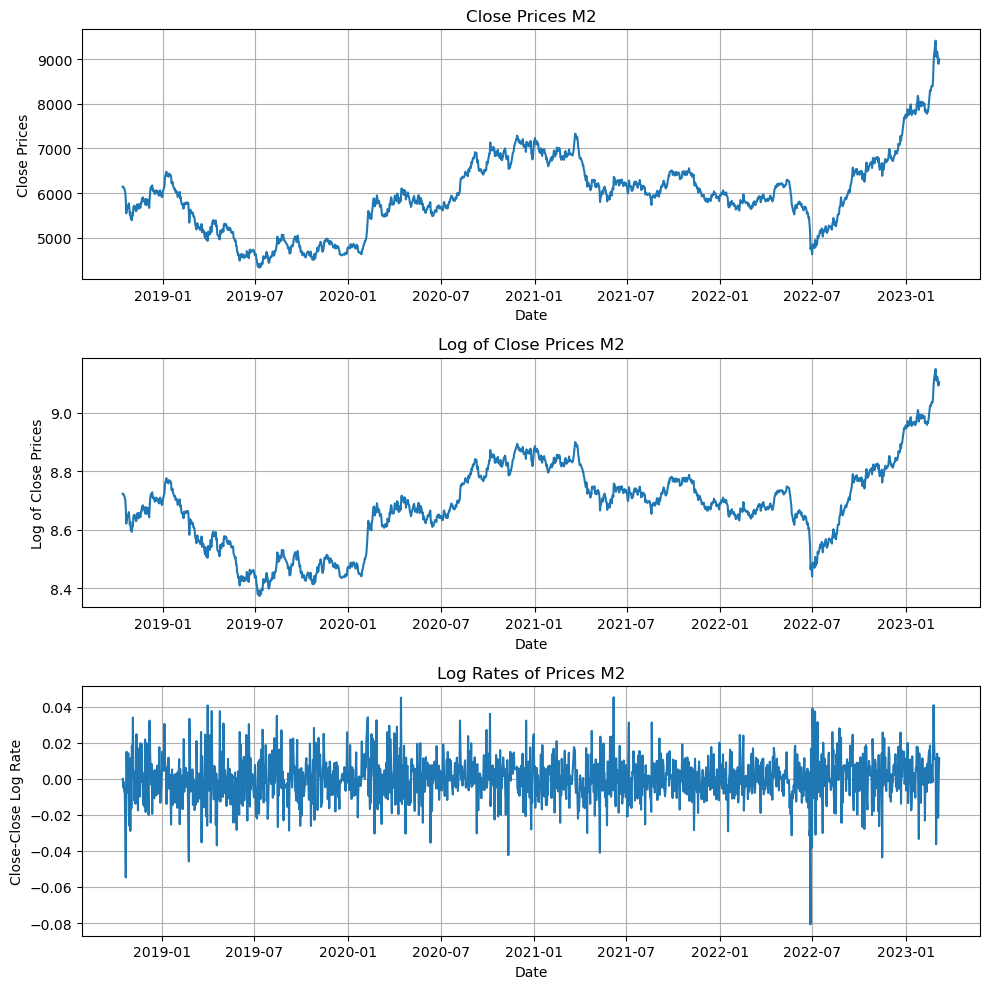

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].grid(True)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Prices')
axs[0].plot(subset['Market2: Close'])
axs[0].set_title('Close Prices M2')

axs[1].grid(True)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log of Close Prices')
axs[1].plot(subset_log_price)
axs[1].set_title('Log of Close Prices M2')

axs[2].grid(True)
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Close-Close Log Rate')
axs[2].plot(subset['Log_Return_M2'])
axs[2].set_title('Log Rates of Prices M2')

plt.tight_layout()
plt.show()


<AxesSubplot:ylabel='Density'>

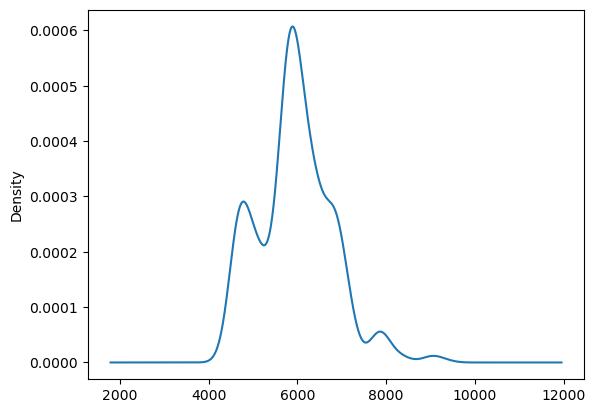

In [17]:
# Probability distribution:
df_close_M2.plot(kind='kde')

## Check for time series' stationarity

Because many time series model require data to be stationary, the checks on this property have been conducted on different combinations of data incluing its log() or differenciating

### ADF Test

One of the most widely used statistical tests is the Dickey-Fuller test. It can be used to determine whether or not a series has a unit root, and thus whether or not the series is stationary. This test’s null and alternate hypotheses are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If the null hypothesis is not rejected, the series is said to be non-stationary. The series can be linear or difference stationary as a result of this.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance)

In [18]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

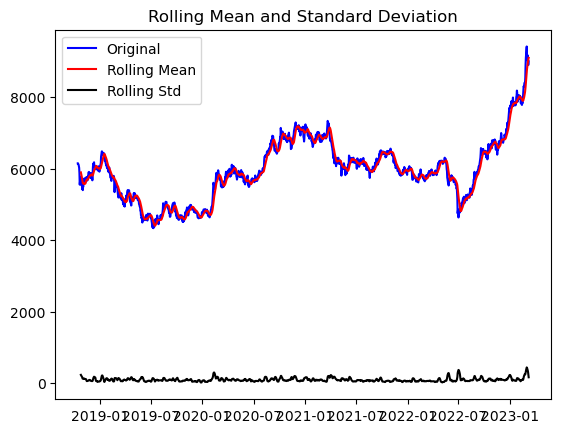

Results of dickey fuller test
Test Statistics                   0.174043
p-value                           0.970768
No. of lags used                 16.000000
Number of observations used    1590.000000
critical value (1%)              -3.434469
critical value (5%)              -2.863359
critical value (10%)             -2.567739
dtype: float64


In [19]:
test_stationarity(df_close_M2) 

Our series clearly is not stationary just by looking onto the graphs, which is also indicated by the p-value, not allowing to reject the null hypothesis about the series being nonlinear, the same goes for the log() of series. We'll try to transform the series to become stationary.

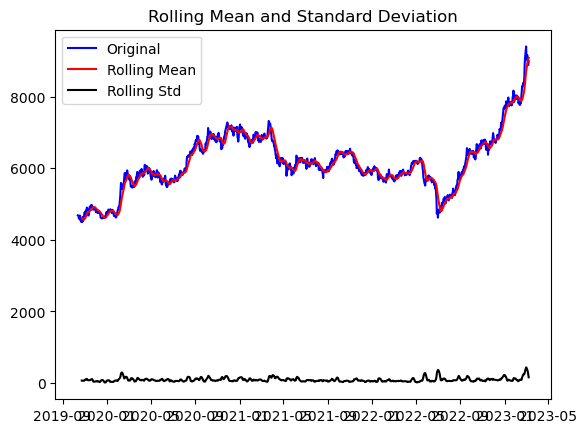

Results of dickey fuller test
Test Statistics                  -0.382358
p-value                           0.913003
No. of lags used                 16.000000
Number of observations used    1226.000000
critical value (1%)              -3.435695
critical value (5%)              -2.863900
critical value (10%)             -2.568027
dtype: float64


In [20]:
# Rolling mean

rolling_mean = subset_log_price.rolling(window=365).mean()
df_log_minus_mean = df_close_M2 - rolling_mean
df_log_minus_mean.dropna(inplace=True)
test_stationarity(df_log_minus_mean)

# Not working - pvalue high

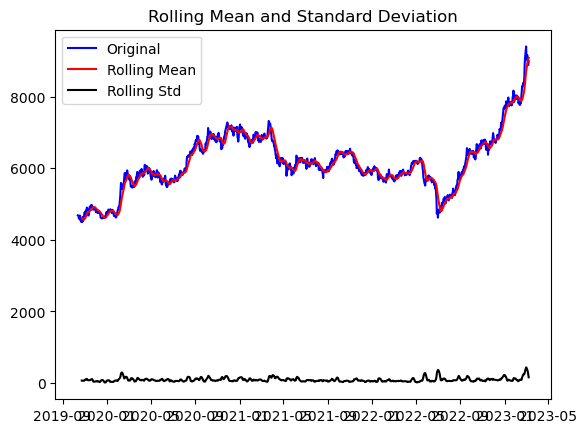

Results of dickey fuller test
Test Statistics                  -0.382358
p-value                           0.913003
No. of lags used                 16.000000
Number of observations used    1226.000000
critical value (1%)              -3.435695
critical value (5%)              -2.863900
critical value (10%)             -2.568027
dtype: float64


In [21]:
#  exponential decay 
rolling_mean_exp_decay = subset_log_price.ewm(halflife=365, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_close_M2 - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)

test_stationarity(df_log_minus_mean) 
# Worse then rolling mean, stil high pvalue

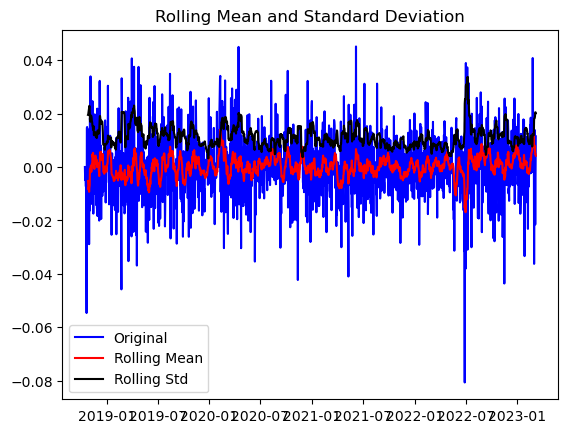

Results of dickey fuller test
Test Statistics               -1.076079e+01
p-value                        2.524057e-19
No. of lags used               1.500000e+01
Number of observations used    1.590000e+03
critical value (1%)           -3.434469e+00
critical value (5%)           -2.863359e+00
critical value (10%)          -2.567739e+00
dtype: float64


In [22]:
# 1st difference
df_log_shift = subset_log_price - subset_log_price.shift()
df_log_shift.dropna(inplace=True)
test_stationarity(df_log_shift) # Great success

Time shifting by one day performed much better than subtracting the rolling mean. The log() of series differenciated by one day is comnfirmed to be stationary so we'll specify arima d parameter to be set as 1.

### Seasonal decomposure

We we to check, spot or possibly exclude the trend and seasonality from the data using seasonal decomposure 

<Figure size 640x480 with 0 Axes>

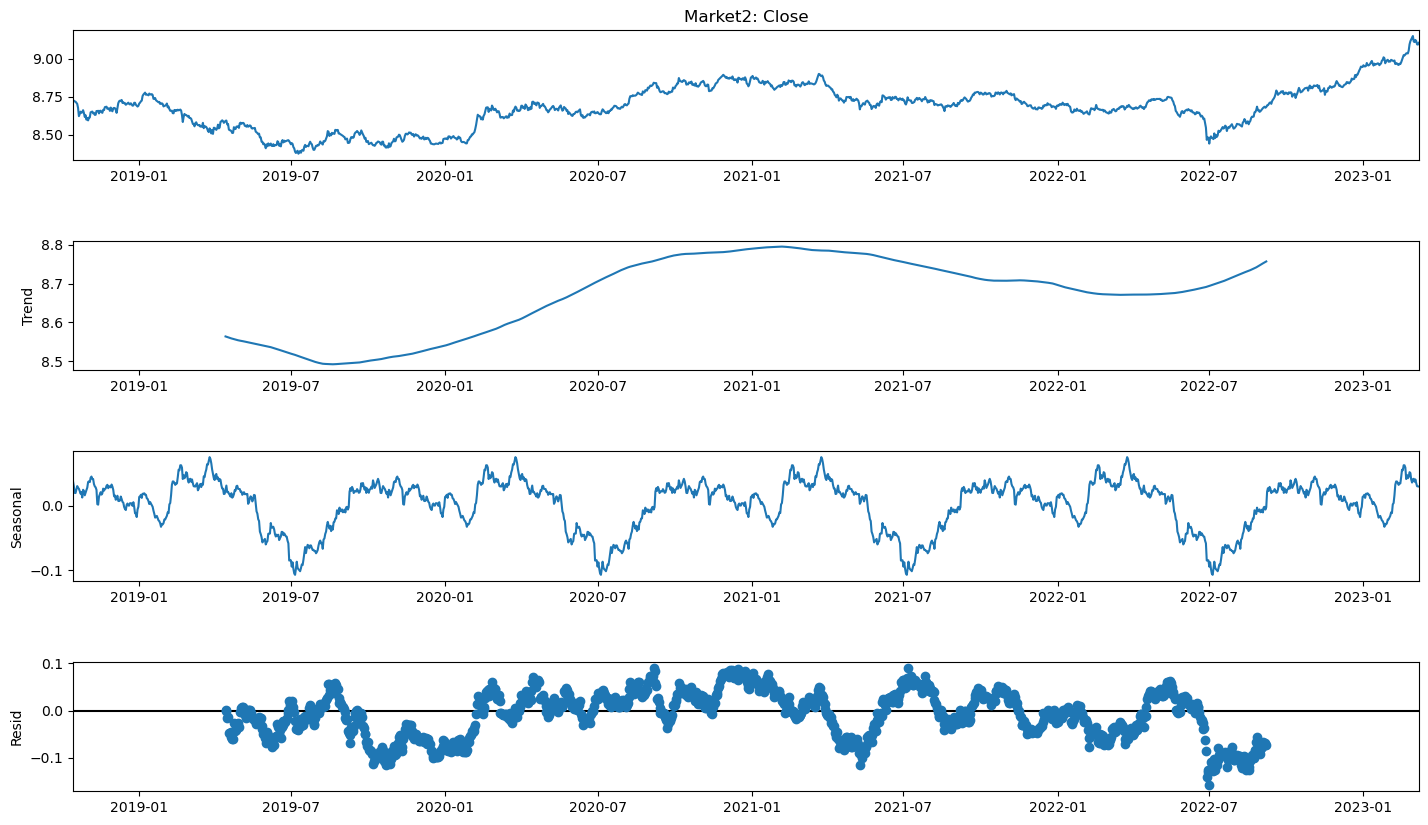

In [23]:
# log_returns_2 = log_returns_2+0.118 # Addding 0,118 to all series to make it possible to decompose it as it doesn't cover negative values
result = seasonal_decompose(subset_log_price, model='additive', period = 365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)
# log_returns_2 = log_returns_2-0.118

We can clearly see that the data is seasonal on yearly basis and has a rather growing trend 

### ACF Plots

The ACF plot shows the correlation between the log rates at different lags, while the PACF plot shows the correlation between the log rates at a specific lag after removing the correlation due to shorter lags.

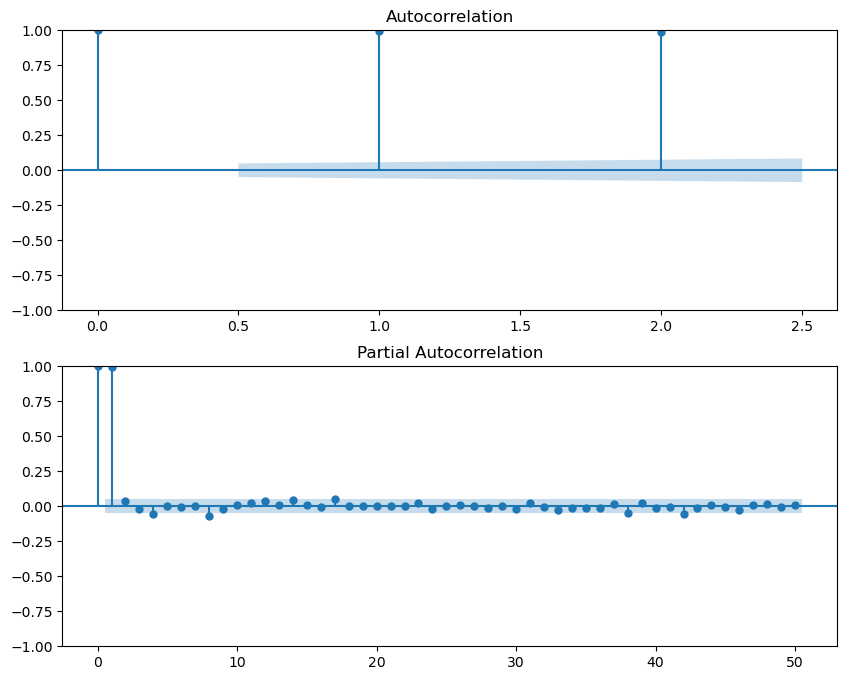

In [24]:
# Plot the ACF and PACF of the log rates
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(subset_log_price, lags=2, ax=ax1)
plot_pacf(subset_log_price, lags=50, ax=ax2)
plt.show()

The PACF plot shows the correlation between a time series and its lagged values after removing the effect of all shorter lags

### Train and test split

In [25]:
# Test and train split taking last 50 observation to test set
TEST_SIZE = 50
train_data, test_data = subset_log_price.iloc[:-TEST_SIZE], subset_log_price.iloc[-TEST_SIZE:]
train_data.shape, test_data.shape

((1557,), (50,))

# ARIMA

ARIMA is a popular and powerful statistical model used for time series analysis and forecasting. ARIMA models are flexible and capable of capturing complex patterns in the data and can help you make more accurate predictions. Because of that, it seems like a good choice for the seasonal stock time series data.

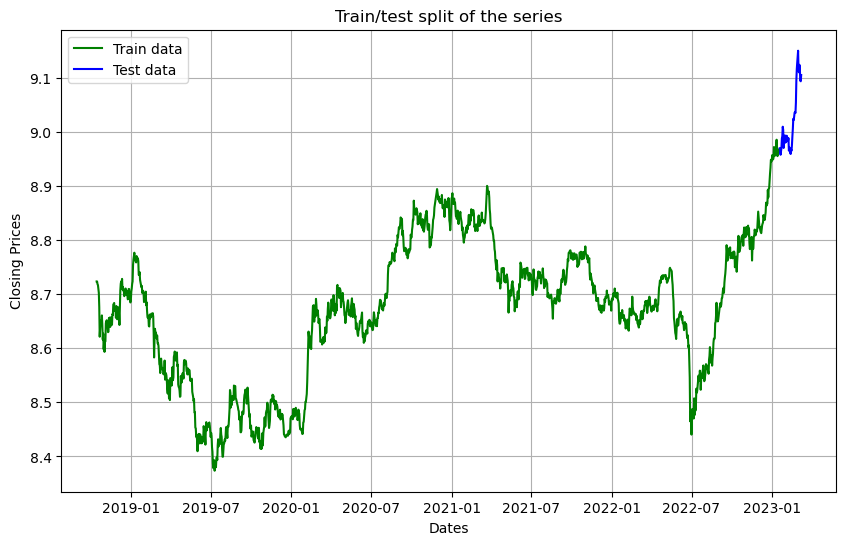

In [26]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.title('Train/test split of the series')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

We'll be choosing the ARIMA p,q, d parameters. do it by looking at the ACF and PACF charts,using Auto ARIMA function. It uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC. We'll be using a log() of time series and setting D parameters to 1 as we already checked that data is stationary in this configuarion.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-8296.900, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-8679.901, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-8295.500, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-8833.439, Time=1.07 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-8829.357, Time=0.54 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-8832.928, Time=1.36 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-8829.242, Time=1.77 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-8833.078, Time=1.41 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=-8830.212, Time=3.44 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=-8831.501, Time=3.16 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]          
Total fit time: 21.148 seconds


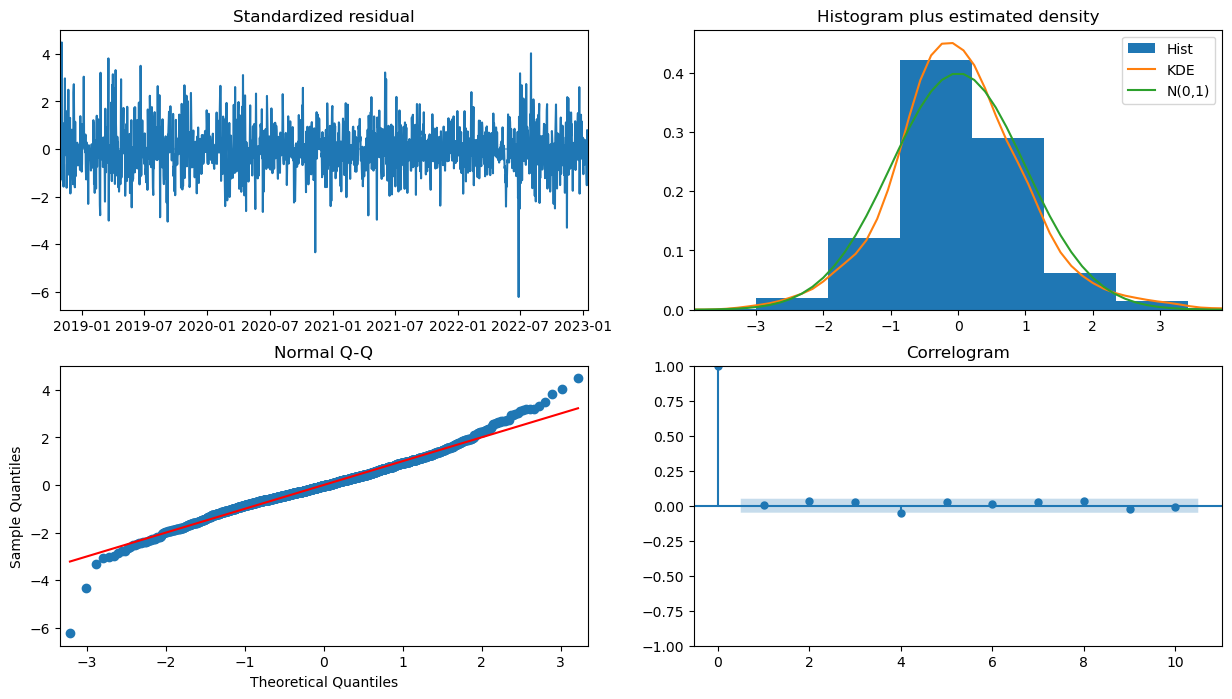

In [27]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      start_P=0,start_Q=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [28]:
model_autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1557
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                4420.719
Date:                            Thu, 20 Apr 2023   AIC                          -8833.439
Time:                                    11:02:37   BIC                          -8812.070
Sample:                                10-14-2018   HQIC                         -8825.490
                                     - 01-17-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0623      0.023     -2.708      0.007      -0.107      -0.017
ar.S.L12      -0.6201      0.023    -26.662      0.000      -0.666      -0.574
ar.S.L24      -0.3106      0.020    -15.266      0.000      -0.351      -0.271
sigma2         0.0002   4.83e-06     39.353      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               270.46
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Interpretation and results:
- Best model based on multiple configurations of parameters is (1,1,0)(2,1,0)[12]
- The residual errors have a uniform variance and go around a mean of zero.
- The data seem to be normally distributed around 0 with slight skewness (red line not being alligned with dots on "Normal Q-Q" plot
- The bottom left graphs shows that residual errors are not autocorrelated. It indicates that the model has captured all the relevant patterns in the data and there is no systematic pattern of variation that remains unexplained.
- We cannot say that the residual distribution is homoscedastic (constant variance) because the p-value of the Heteroskedasticity test (Prob(H)) is smaller than 0.05

In [29]:
model_autoARIMA.fit(train_data) 

# Forecasting
n_periods = len(test_data)
fc, confint = model_autoARIMA.predict(n_periods=n_periods, return_conf_int=True)
fc_series = pd.Series(fc)
fc_series.index=test_data.index

In [30]:
test_real=subset['Market2: Close'].loc['2023-01-18':'2023-03-08']
train_real = subset['Market2: Close'].loc[:'2023-01-18']

### Reverse log rates back to close prices

In [31]:
# Calculate the predicted close prices based on the predicted log
prices = np.exp(fc_series.values)

index = pd.date_range(start='2023-01-18', end='2023-03-08')
prices_series = pd.Series(prices, index=index)

In [32]:
def plot_prediction(df_train,df_test,df_pred):
    plt.figure(figsize=(8,5))
    plt.plot(df_train.loc['2022-11-01':'2023-01-16'],label='Train')
    plt.plot(df_test.loc['2023-01-16':'2023-03-08'],label='Test')
    plt.plot(df_pred,label='Prediction')
    plt.legend(loc='best')
    plt.show()

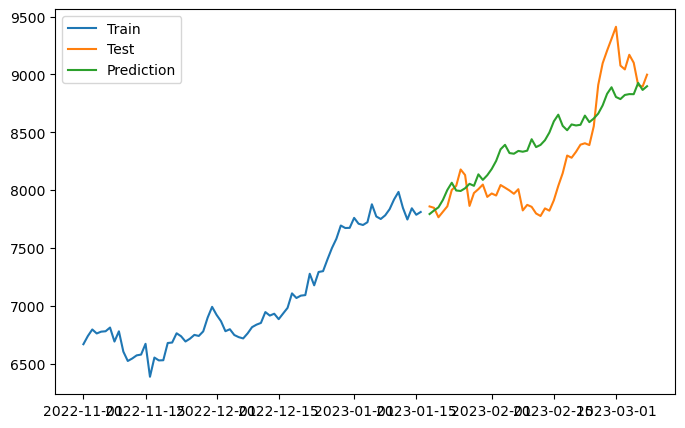

In [33]:
plot_prediction(train_real,test_real,prices_series)

Model seems to be prediting quite well for the first couple of days, afterwards it doesn't follow a growing trend of the test series.

### Model Evaluation

Multiple metrics have been used to asses the model performance

In [34]:
# create a df to store the accuracy results
results_df = pd.DataFrame(columns=['model_name', 'mape', 'me', 'mae', 'mpe', 'rmse', 'acf1', 'corr', 'minmax'])

def forecast_accuracy(forecast, actual, model_name):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(prices_series-test_real)[1]  # ACF1
    
    # create a dictionary of the accuracy metrics and model name
    accuracy_dict = {'model_name': model_name, 'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax}
    
    # append the dictionary to the results_df
    global results_df
    results_df = results_df.append(accuracy_dict, ignore_index=True)
    
    return accuracy_dict


In [35]:
forecast_accuracy(prices_series, test_real, 'SARIMA')

{'model_name': 'SARIMA',
 'mape': 0.03411828535244561,
 'me': 133.00654262657636,
 'mae': 280.64796607677823,
 'mpe': 0.01777635336082688,
 'rmse': 339.2555362771328,
 'acf1': 0.9125734938340352,
 'corr': 0.7895790777457078,
 'minmax': 0.03277582054445716}

The errors don't seem to be very big big, especially looking at MAPE but it's not as insightful without the comparison to other models, to which we'll come up to in further part of the analysis.

As the model is supposed to be predicting a decrease or an increase of the value for the next day, the following function has been built to capture the changes and compare them with actual values.

In [36]:
binary_results_df = pd.DataFrame(columns=['model_name', 'good_preds', 'perc_good_pred'])


def binary_assessment(test_df, pred_df,model_name):
    # Daily differences for test data
    test_diff = np.sign(test_df.diff())

    # Daily differences for predicted values
    predicted_diff = np.sign(pred_df.diff())

    # Plotting test data and predicted values
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(test_df.index, test_df.values, label='Test Data')
    ax.plot(pred_df.index, pred_df.values, label='Predicted Values')

    # Correct predictions
    correct_mask = (predicted_diff[1:] == test_diff[1:])
    correct_dates = pred_df.index[1:][correct_mask.values]
    ax.scatter(correct_dates, pred_df.loc[correct_dates], color='g', label='Correct Predictions')

    # Incorrect predictions
    incorrect_mask = (predicted_diff[1:] != test_diff[1:])
    incorrect_dates = pred_df.index[1:][incorrect_mask.values]
    ax.scatter(incorrect_dates, pred_df.loc[incorrect_dates], color='r', label='Incorrect Predictions')

    ax.set_title("Test Data and Predicted Values")
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.legend()
    plt.show()

    correct_mask = correct_mask.sum()
    pct_correct = 100 * correct_mask / 50

    print("Number of correct predictions:", correct_mask, "/ 50")
    print("Percentage of correct predictions:", pct_correct, "%")
    
    global binary_results_df
    
    # create a dictionary of the accuracy metrics and model name
    binary_dict = {'model_name': model_name, 'good_preds':correct_mask, 'perc_good_pred':pct_correct}
    
    # append the dictionary as a new row to the binary_results_df
    global binary_results_df
    binary_results_df = binary_results_df.append(binary_dict, ignore_index=True)


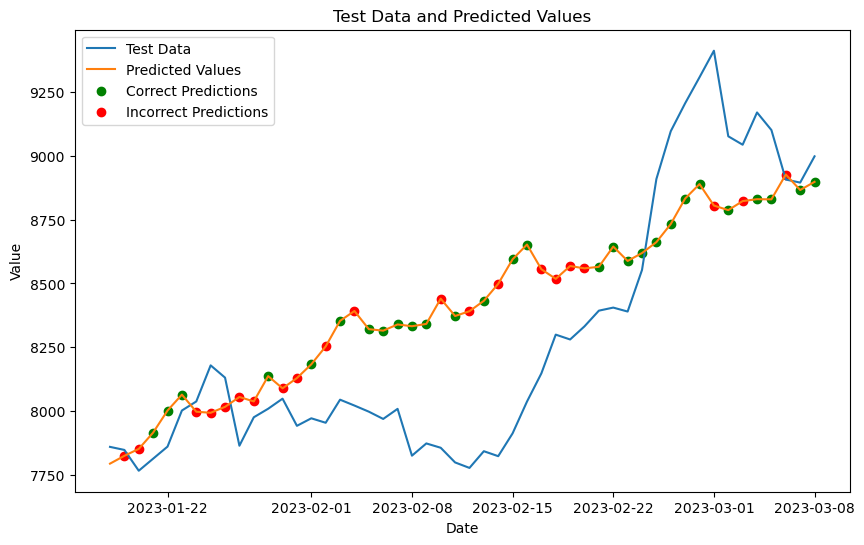

Number of correct predictions: 28 / 50
Percentage of correct predictions: 56.0 %


In [37]:
binary_assessment(test_real,prices_series,'SARIMA')

# Exponential smoothing

Exponential smoothing is a widely used method for time series forecasting, including univariate data. The basic idea behind it is to give more weight to recent observations and less weight to older observations, with the amount of weight given to each observation decreasing exponentially as it becomes older.

Exponential smoothings methods are appropriate for non-stationary data so we would not have to work on log rates neccesairly. Another advantage is that ETS is especially helpful for the data with a large seasonal component.

In this case we'd have to again transform our 3 markets data into a univariate containing just market 2. It involves applying a smoothing factor to a series of observations to generate a forecast of future values. The smoothing factor, denoted as alpha, determines the weight given to the most recent observation and its effect on the forecast.

Since our data on daily basis has a yearly seasonal component, we can try to go with a Holt Winters (triple exponential smoothing) on the same train and test datasets as used for ARIMA model with a log() function put on top of close commodity M2 values

<Figure size 640x480 with 0 Axes>

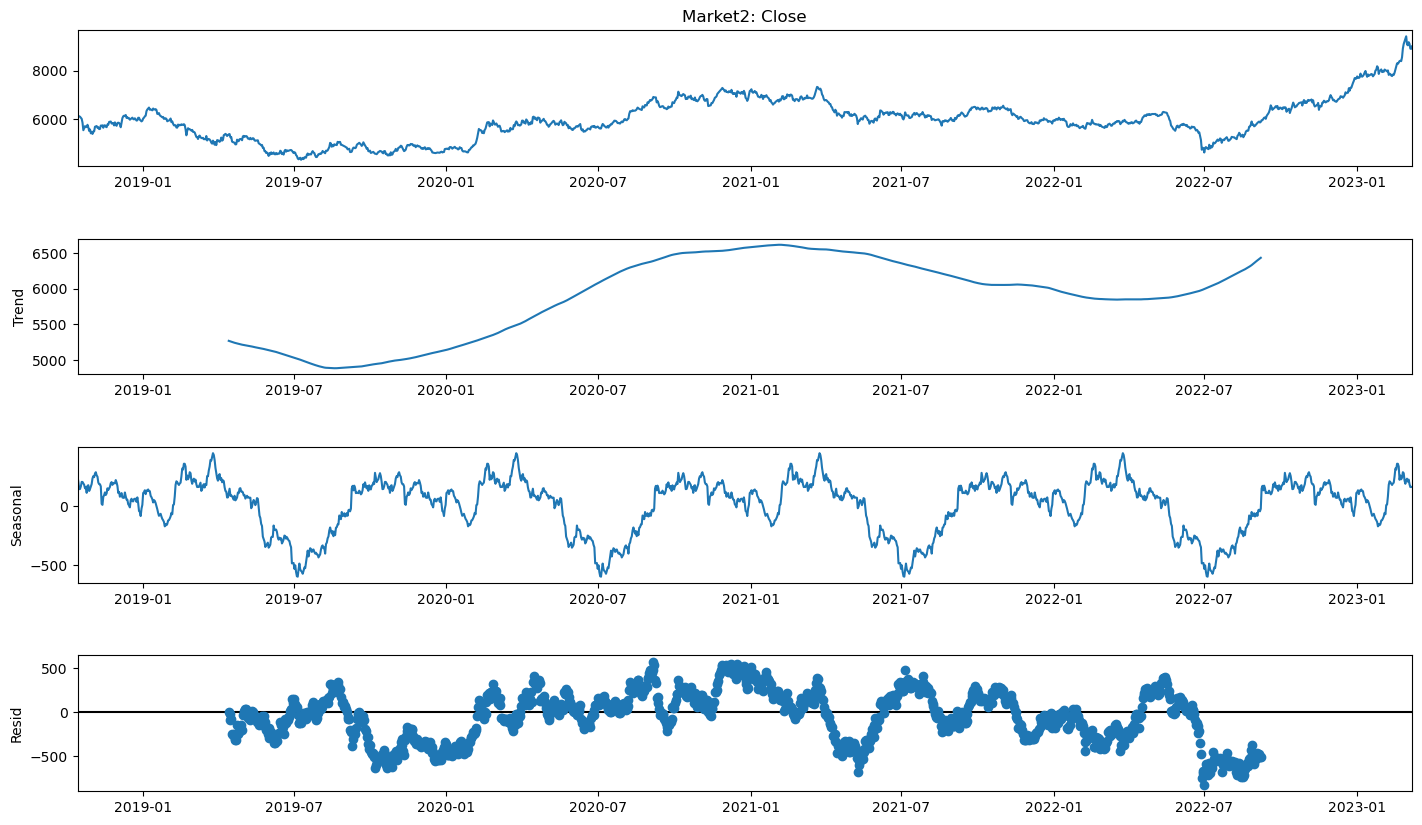

In [38]:
# Seasonal decomposure to check data once again
result = seasonal_decompose(df_close_M2, period = 365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

What we see from above's plots is the clear seasonality and which fluctuations remain similar with the time, meaning we'll be using an additive character in the Holt's Winter model

In [39]:
model_holt_winters = ExponentialSmoothing(train_data, trend='add', 
                                          seasonal='add', seasonal_periods=365).fit(optimized=True)

In [40]:
model_holt_winters.summary()

Dep. Variable:,Market2: Close,No. Observations:,1557
Model:,ExponentialSmoothing,SSE,0.172
Optimized:,True,AIC,-13451.989
Trend:,Additive,BIC,-11477.649
Seasonal:,Additive,AICC,-13219.058
Seasonal Periods:,365,Date:,"Thu, 20 Apr 2023"
Box-Cox:,False,Time:,11:02:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9374203,alpha,True
smoothing_trend,2.0269e-07,beta,True


In [41]:
pred_hw=model_holt_winters.forecast(len(test_data))

In [42]:
# Calculate the predicted close prices based on the predicted log
prices_hw = np.exp(pred_hw.values)

index = pd.date_range(start='2023-01-18', end='2023-03-08')
prices_hw = pd.Series(prices_hw, index=index)

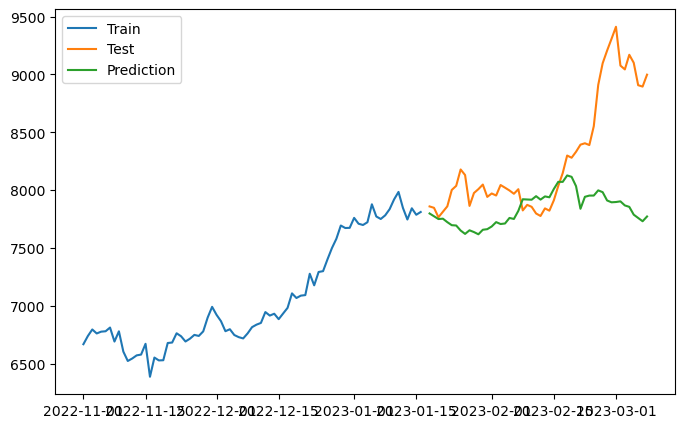

In [43]:
plot_prediction(train_real,test_real,prices_hw)

In [44]:
forecast_accuracy(prices_hw, test_real, 'ETS')

{'model_name': 'ETS',
 'mape': 0.054746116828856,
 'me': -442.43164256662095,
 'mae': 476.3704451399955,
 'mpe': -0.05041584830413138,
 'rmse': 656.4754078371694,
 'acf1': 0.9125734938340352,
 'corr': 0.2146474929811268,
 'minmax': 0.054716289985310196}

### Calculate binary changes

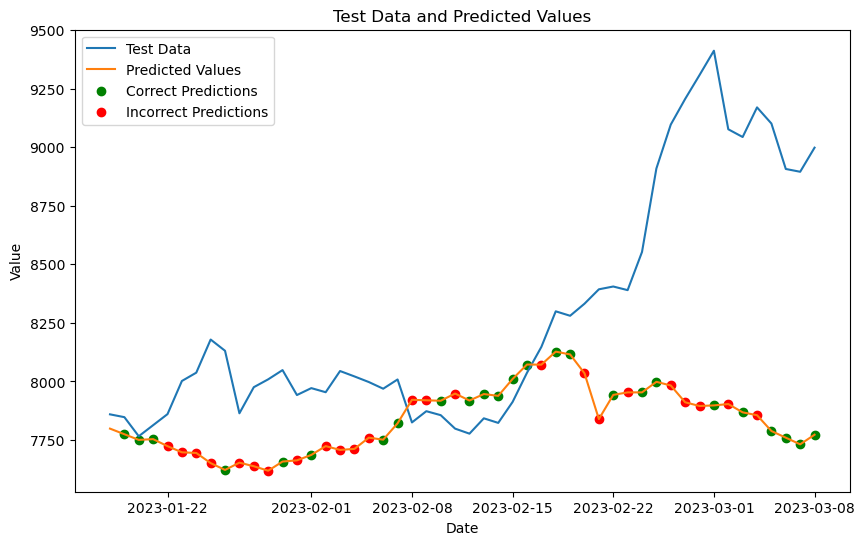

Number of correct predictions: 25 / 50
Percentage of correct predictions: 50.0 %


In [45]:
binary_assessment(test_real,prices_hw,'ETS')

The fitted model does not predict extremely well and its errors are higher then SARIMA's.

# VAR

VaR models are another option for predicting time series of 3 markets we have. It's a multivariate extension of an AR model, where the past values of all the time series in the system are used to predict the future values of each series. In a VAR model, each variable in the system is treated as a linear function of its own past values and the past values of the other variables in the system. 

In this apporoach we'll be working on logarighmic close-close rates of the time series values for all 3 markets but first the checks on stationarity, causation and cointegration are needed.

In [46]:
df_3m_rates=df_3m_rates.tail(-1)

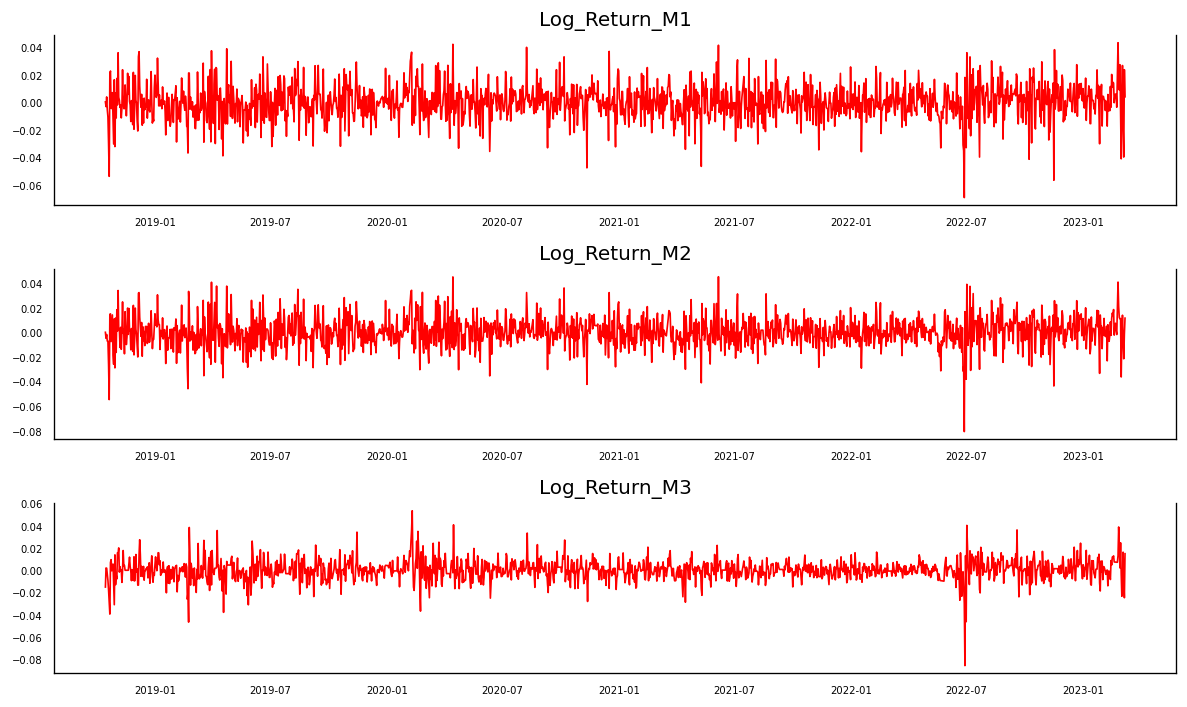

In [47]:
# Plotting series

fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_3m_rates[df_3m_rates.columns[i]]
    ax.plot(data, color=
            'red', linewidth=1)
    # Decorations
    ax.set_title(df_3m_rates.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

### Check for stationarity

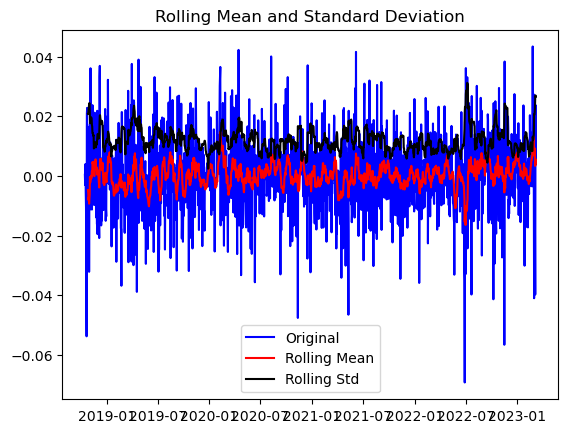

Results of dickey fuller test
Test Statistics                 -41.023792
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1605.000000
critical value (1%)              -3.434431
critical value (5%)              -2.863342
critical value (10%)             -2.567730
dtype: float64


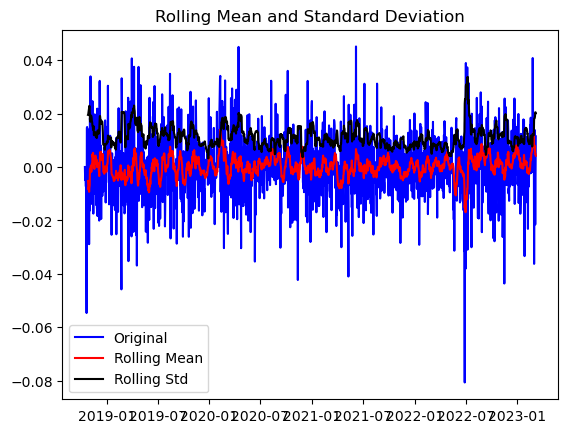

Results of dickey fuller test
Test Statistics               -1.076079e+01
p-value                        2.524057e-19
No. of lags used               1.500000e+01
Number of observations used    1.590000e+03
critical value (1%)           -3.434469e+00
critical value (5%)           -2.863359e+00
critical value (10%)          -2.567739e+00
dtype: float64


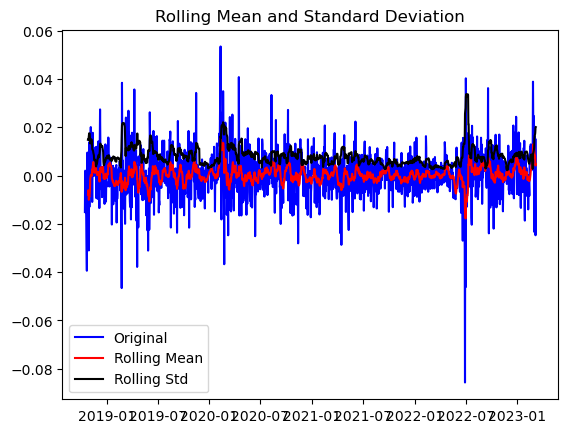

Results of dickey fuller test
Test Statistics                 -33.982614
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1605.000000
critical value (1%)              -3.434431
critical value (5%)              -2.863342
critical value (10%)             -2.567730
dtype: float64


In [48]:
test_stationarity(df_3m_rates['Log_Return_M1'])
test_stationarity(df_3m_rates['Log_Return_M2'])
test_stationarity(df_3m_rates['Log_Return_M3'])

For all markets, there's a strong evidence against the null hypothesis, hence we reject it. Data has no unit root and is stationary

### Causation 

Testing the causation using Granger’s Causality Test. The null hypothesis states that the coefficients of past values in the regression equation is zero


In [49]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [50]:
grangers_causation_matrix(df_3m_rates, variables = df_3m_rates.columns)   

,Log_Return_M1_x,Log_Return_M2_x,Log_Return_M3_x
Log_Return_M1_y,1.0,0.0261,0.1241
Log_Return_M2_y,0.0,1.0000,0.0317
Log_Return_M3_y,0.0,0.0000,1.0000


If a given p-value is lowe significance level of 0.05, then, the corresponding column value causes the row (Y). What we observe is that all the variables in the future model are interchangeably causing each other.

### Correlation check

In [51]:
df_3m_rates.corr()

,Log_Return_M1,Log_Return_M2,Log_Return_M3
Log_Return_M1,1.000000,0.924886,0.180085
Log_Return_M2,0.924886,1.000000,0.198802
Log_Return_M3,0.180085,0.198802,1.000000


As we can see markets 1 and 2 are quite strongly correlated with each other. This signifies that predicting with VAR model might be possible and provide decent results

### Cointegration Test

Cointegration refers to the number of times a time series needs to be differenced in order to become stationary. A stationary time series can be integrated or non-integrated.

Testing for integration is important because it helps to determine the appropriate order of differencing needed to achieve stationarity in the time series. Even if the time series is already stationary, it is possible that differencing could improve the properties of the time series and make it easier to model accurately.

To do that, we perform a Johanson's Cointegration Test

In [53]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
mnm 
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


NameError: name 'mnm' is not defined

In [54]:
cointegration_test(df_3m_rates)

NameError: name 'cointegration_test' is not defined

In [55]:
# Split the data into train and test sets
train_data_var, test_data_var = df_3m_rates.iloc[:-TEST_SIZE], df_3m_rates.iloc[-TEST_SIZE:]
train_data_var.shape, test_data_var.shape

((1556, 3), (50, 3))

### Selection of the right order for the VaR model

In [56]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(train_data_var)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-29.01,-29.00,2.527e-13,-29.00
1,-30.10,-30.06,8.480e-14,-30.08
2,-30.21,-30.14,7.565e-14,-30.19
3,-30.27,-30.17*,7.147e-14,-30.23
4,-30.28,-30.15,7.059e-14,-30.23*
5,-30.29,-30.12,7.020e-14,-30.23
6,-30.29,-30.09,6.995e-14,-30.22
7,-30.29*,-30.06,6.983e-14*,-30.21
8,-30.29,-30.03,6.998e-14,-30.19
9,-30.29,-30.00,7.017e-14,-30.18


A key element of the VAR model is the choice of a right lag. In this case, the decision has been made ot proceed with the lag = 4 as it gave best results from the applied cryteria and is not too big.

In [57]:
model_fitted = model.fit(4) # Choosing lag 4 based on above's table
model_fitted.summary() # Important variables: Lag 1 for all markets, Lag 2 for M2, Lag 3 for M1 and M3

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Apr, 2023
Time:                     11:40:55
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -30.1255
Nobs:                     1552.00    HQIC:                  -30.2099
Log likelihood:           16914.1    FPE:                7.21623e-14
AIC:                     -30.2599    Det(Omega_mle):     7.03789e-14
--------------------------------------------------------------------
Results for equation Log_Return_M1
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.000175         0.000319            0.549           0.583
L1.Log_Return_M1        -0.140214         0.077279           -1.814           0.070
L1.Log_Return_M2         0.129742       

As we can see, only few variables for limited lags are important for value of market 2.

In [58]:
# Check for serial autocorrelation
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_data_var.columns, out):
    print((col), ':', round(val, 2))

Log_Return_M1 : 2.0
Log_Return_M2 : 2.0
Log_Return_M3 : 2.01


The closer it is to the value 2, then there is no significant serial correlation, so it seems alright.

In [59]:
# Get the lag order
lag_order = model_fitted.k_ar

# Input data for forecasting
forecast_input = train_data_var.values[-lag_order:]

### Forecast

In [60]:
fc = model_fitted.forecast(y=forecast_input, steps=50)
df_forecast = pd.DataFrame(fc, index=df_3m_rates.index[-50:], columns=df_3m_rates.columns + '_Pred_lograte')

In [61]:
# Calculate the predicted close prices based on the predicted log returns
rates_var = np.exp(df_forecast['Log_Return_M2_Pred_lograte'].values)
prices_var = np.array([series_inter['Market2: Close'].loc['2023-01-16'] * rates_var[0]])

for i in range(1, 50):
    prices_var = np.append(prices_var, prices_var[i-1] * rates_var[i])

index = pd.date_range(start='2023-01-18', end='2023-03-08')
prices_series_var_m2 = pd.Series(prices_var, index=index)


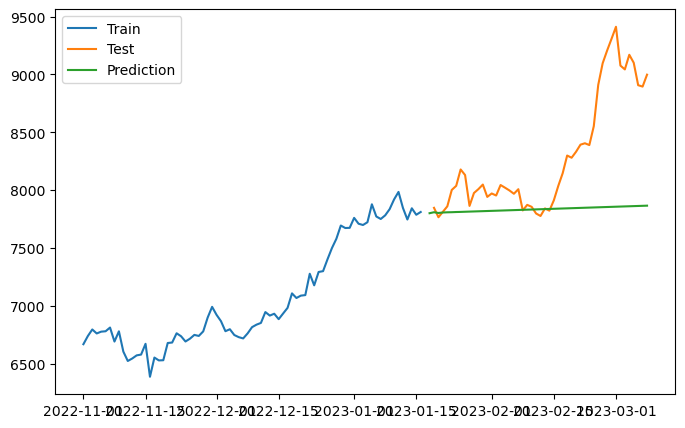

In [62]:
# Plot results
plot_prediction(series_inter['Market2: Close'].loc['2022-11-01':'2023-01-18']
                ,series_inter['Market2: Close'].loc['2023-01-19':'2023-03-08'],
                prices_series_var_m2)

In [63]:
# Checking forecast accuracy
forecast_accuracy(prices_series_var_m2, test_real, 'VAR')

{'model_name': 'VAR',
 'mape': 0.051379742787053505,
 'me': -444.83553183821726,
 'mae': 450.8707514275747,
 'mpe': -0.05060455731348142,
 'rmse': 654.8763415422895,
 'acf1': 0.9125734938340352,
 'corr': 0.8117896192805585,
 'minmax': 0.05137768152648048}

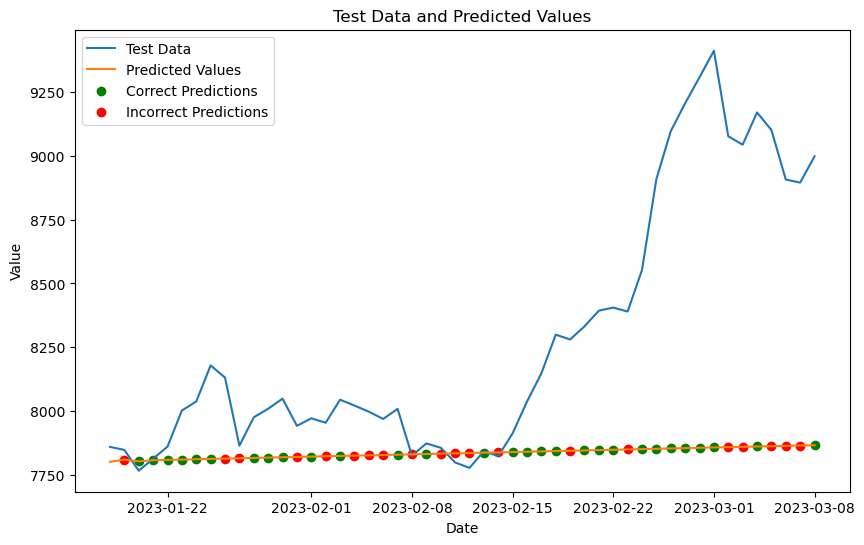

Number of correct predictions: 29 / 50
Percentage of correct predictions: 58.0 %


In [64]:
# Checking the changes
binary_assessment(test_real,prices_series_var_m2, 'VAR')

Even though the model has solid binary errors we cannot say it's working well. The predicted values are not very much different from each other and only in the very first days the model is performing decently.

# General conclusions

The tables with the models performances measures can be found below

In [65]:
results_df

,model_name,mape,me,mae,mpe,rmse,acf1,corr,minmax
0,SARIMA,0.034118,133.006543,280.647966,0.017776,339.255536,0.912573,0.789579,0.032776
1,ETS,0.054746,-442.431643,476.370445,-0.050416,656.475408,0.912573,0.214647,0.054716
2,VAR,0.051380,-444.835532,450.870751,-0.050605,654.876342,0.912573,0.811790,0.051378


In [66]:
binary_results_df

,model_name,good_preds,perc_good_pred
0,SARIMA,28,56.0
1,ETS,25,50.0
2,VAR,29,58.0


After having conducted 3 different approachs to modeling there's no easy and simple conclusion. All models are performing of a similar level but they all have their strenghs and weaknesses. If one model would need to chosed, it should probably be SARIMA due to it's low error values and nice binary predicting accuracy.

VaR model is not the best fit in this case as its nature is more fit to study on dependencies between market, rather than straightfoward prediction. However, is has been used as markets correlated between each other giving results just on the general growing tendency of the future time series values.

Winter-Holt's model seemed like a great fit for the case as it doesn't require stationarity and works well with seasonal data but as displayed in above tables, the binary predictions are wrong in half of the cases, being slightly worse then in the other 2 models.